# Análise Exploratória de Dados: Conjunto de Dados de Diamantes

- **Descrição dos dados**: informações sobre a quantidade de instâncias, variáveis e seus tipos, quantidade de valores faltantes. Utilize o dicionário de dados nessa seção.
- **Perguntas de partida e hipóteses**: que tipo de informações podem ser obtidas a partir dos dados e quais hipóteses podem ser levantadas?
- **Insights**: respostas às perguntas feitas na seção anterior e quais informações interessantes podem ser levantadas através dos dados?

## 1. Descrição dos dados

In [17]:
dados.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


O conjunto de dados diamonds contém informações sobre 53.940 diamantes, organizadas em 10 variáveis. As principais variáveis incluem características físicas dos diamantes, como peso (carat), qualidade do corte (cut), cor (color), pureza (clarity), dimensões (x, y, z), e preço (price). Cada variável tem um tipo específico e significado descrito abaixo:

- **carat** (numérico): peso do diamante.
- **cut** (categórico): qualidade do corte, categorizado em Fair, Good, Very Good, Premium e Ideal.
- **color** (categórico): classificação da cor do diamante, variando de D (mais transparente) a J (menos transparente).
- **clarity** (categórico): medida de pureza, categorizado em oito níveis, desde IF (Internally Flawless) até I3 (inclusões visíveis).
- **depth** (numérico): profundidade total do diamante em relação ao diâmetro médio, expressa como porcentagem.
- **table** (numérico): largura da maior face do diamante, também em porcentagem.
- **price** (numérico): preço do diamante em dólares americanos.
- **x, y, z** (numéricos): dimensões do diamante em milímetros (comprimento, largura e profundidade, respectivamente).

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

- Verificando estrutura de dados

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- Descrição dos dados

In [11]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


- Verificando valores nulos e faltantes

In [12]:
valores_nulos = dados.isnull().values.any()

if valores_nulos:
    print("Há valores nulos na tabela.")
else:
    print("Não há valores nulos na tabela.")

Não há valores nulos na tabela.


In [13]:
print(f'Verificando valores faltantes : \n\n{dados.isna().sum()}')

Verificando valores faltantes : 

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


- Valores repetidos

In [14]:
dados.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

- Verificando dados discrepantes

In [15]:
dados.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Perguntas de partida e hipóteses

### Perguntas de partida

1. Qual é a **distribuição dos preços** dos diamantes e quais **fatores influenciam mais** os valores?
2. Há uma relação clara entre o **peso** do diamante (carat) e o **preço**?
3. Qual o impacto das **características qualitativas**, como *cut*, *color* e *clarity*, **no preço**?
4. Existe alguma correlação entre as **dimensões físicas** dos diamantes (x, y, z) e o **preço**?
5. Quais combinações de **características** resultam em diamantes com **maior valor** no mercado?
    
### Hipóteses

1. Diamantes com **maior peso** (carat) tendem a ter **preços mais elevados**.
2. **Qualidade superior de corte** (cut) está associada a **preços mais altos**.
3. Diamantes com **menor coloração** (mais próximos de D) e **maior pureza** (clarity mais alta) possuem **preços mais elevados**.
4. **Dimensões fora do padrão** ideal (relativo à profundidade e tabela) podem **reduzir o valor de mercado** dos diamantes.
5. Há uma **correlação positiva** entre o **peso** (carat) e as **dimensões físicas** (x, y, z).

### Respondendo as perguntas
    1. Qual é a distribuição dos preços dos diamantes e quais fatores influenciam mais os valores?

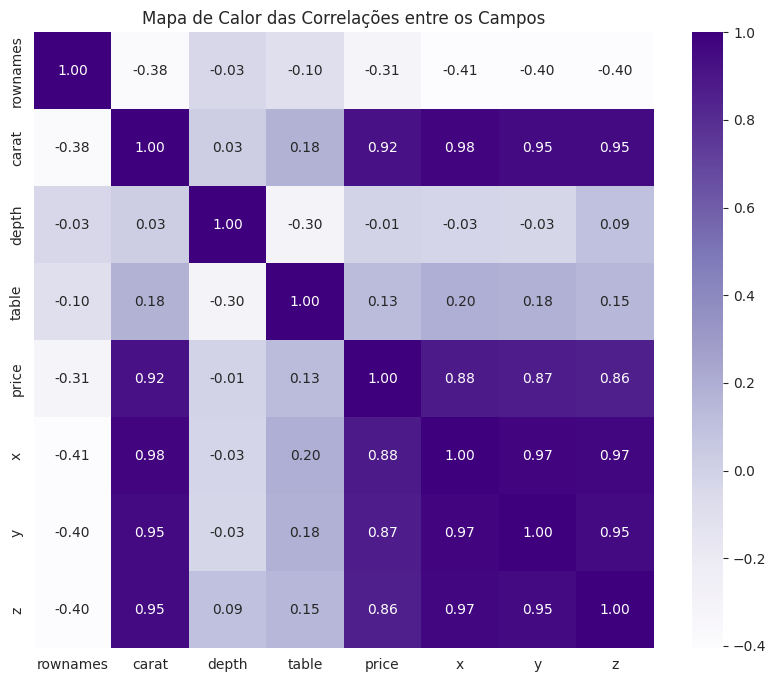

In [36]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregando o conjunto de dados
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
dados = pd.read_csv(url)

# Configurando o estilo para os gráficos
sns.set_style("whitegrid")

# Gráfico de agrupamento e mapa de calor das correlações
plt.figure(figsize=(10, 8))
correlacao = dados.corr(numeric_only=True)  # Cálculo da correlação apenas para colunas numéricas
sns.heatmap(correlacao, annot=True, cmap="Purples", fmt=".2f")
plt.title('Mapa de Calor das Correlações entre os Campos')
plt.show()

A maioria dos diamantes está concentrada em uma faixa de preço mais acessível, mas há valores extremos que representam pedras de alto valor.

2. Há uma relação clara entre o **peso** do diamante (carat) e o **preço**?

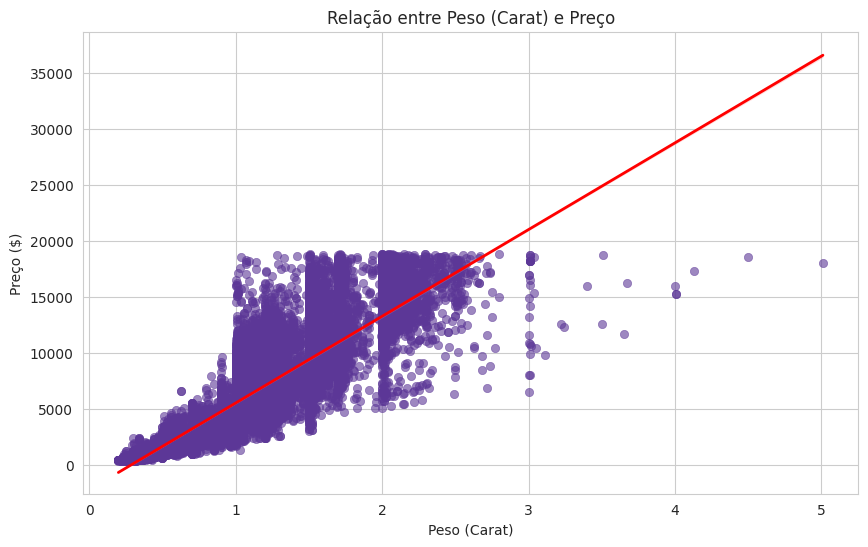

In [39]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregando o conjunto de dados
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
dados = pd.read_csv(url)

# Configurando o estilo para os gráficos
sns.set_style("whitegrid")

# Gráfico de dispersão para analisar a relação entre peso e preço
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='carat', 
    y='price', 
    data=dados, 
    color='#5C3797',  # Definindo uma cor específica para os pontos
    alpha=0.6, 
    edgecolor=None
)
sns.regplot(
    x='carat', 
    y='price', 
    data=dados, 
    scatter=False, 
    color='red', 
    line_kws={'linewidth': 2}
)
plt.title('Relação entre Peso (Carat) e Preço')
plt.xlabel('Peso (Carat)')
plt.ylabel('Preço ($)')
plt.show()

3. Qual o impacto das **características qualitativas**, como *cut*, *color* e *clarity*, **no preço**?

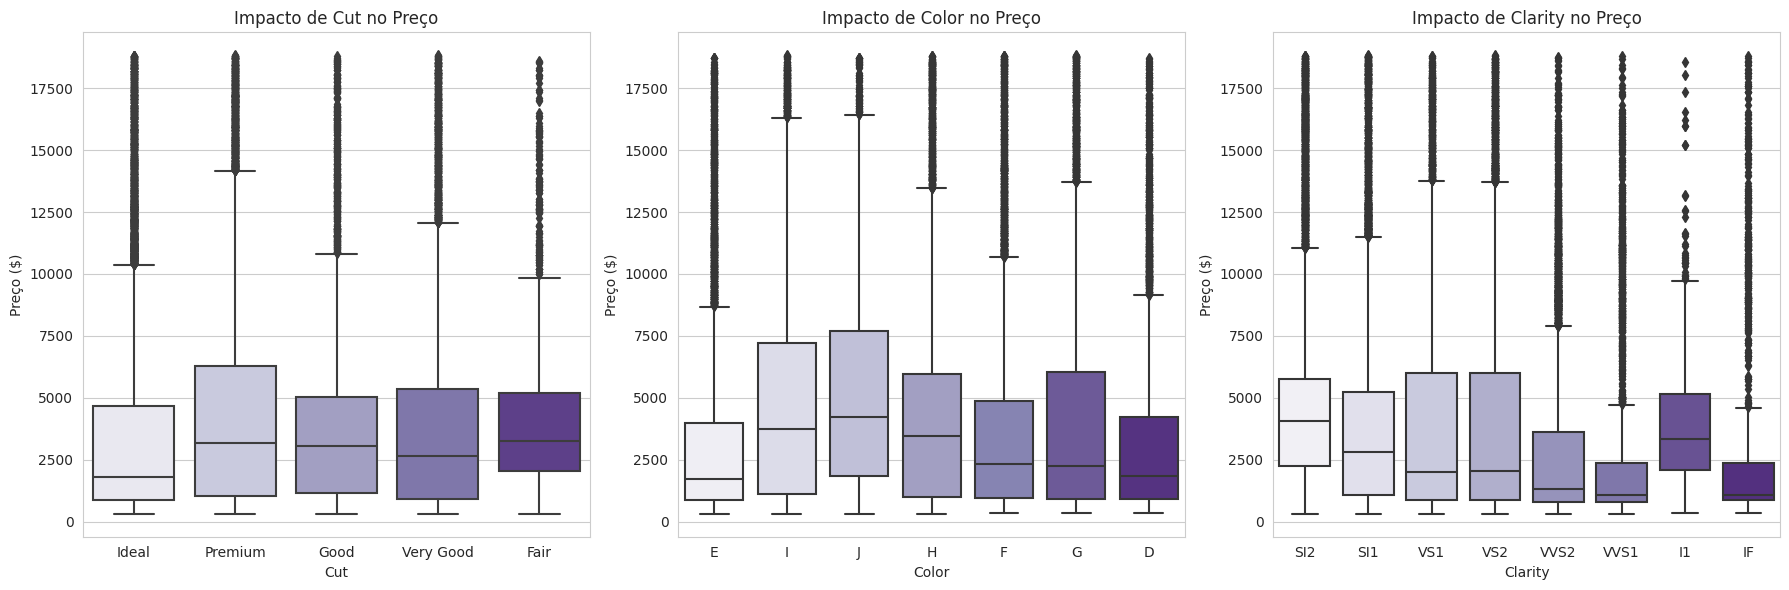

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregando o conjunto de dados
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
dados = pd.read_csv(url)

# Configurando o estilo para os gráficos
sns.set_style("whitegrid")

# Gráficos de boxplot para visualizar o impacto das características qualitativas no preço

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot para o impacto de 'cut' no preço
sns.boxplot(ax=axes[0], x='cut', y='price', data=dados, palette='Purples')
axes[0].set_title('Impacto de Cut no Preço')
axes[0].set_xlabel('Cut')
axes[0].set_ylabel('Preço ($)')

# Boxplot para o impacto de 'color' no preço
sns.boxplot(ax=axes[1], x='color', y='price', data=dados, palette='Purples')
axes[1].set_title('Impacto de Color no Preço')
axes[1].set_xlabel('Color')
axes[1].set_ylabel('Preço ($)')

# Boxplot para o impacto de 'clarity' no preço
sns.boxplot(ax=axes[2], x='clarity', y='price', data=dados, palette='Purples')
axes[2].set_title('Impacto de Clarity no Preço')
axes[2].set_xlabel('Clarity')
axes[2].set_ylabel('Preço ($)')

# Exibindo os gráficos
plt.tight_layout()
plt.show()


4. Existe alguma correlação entre as **dimensões físicas** dos diamantes (x, y, z) e o **preço**?

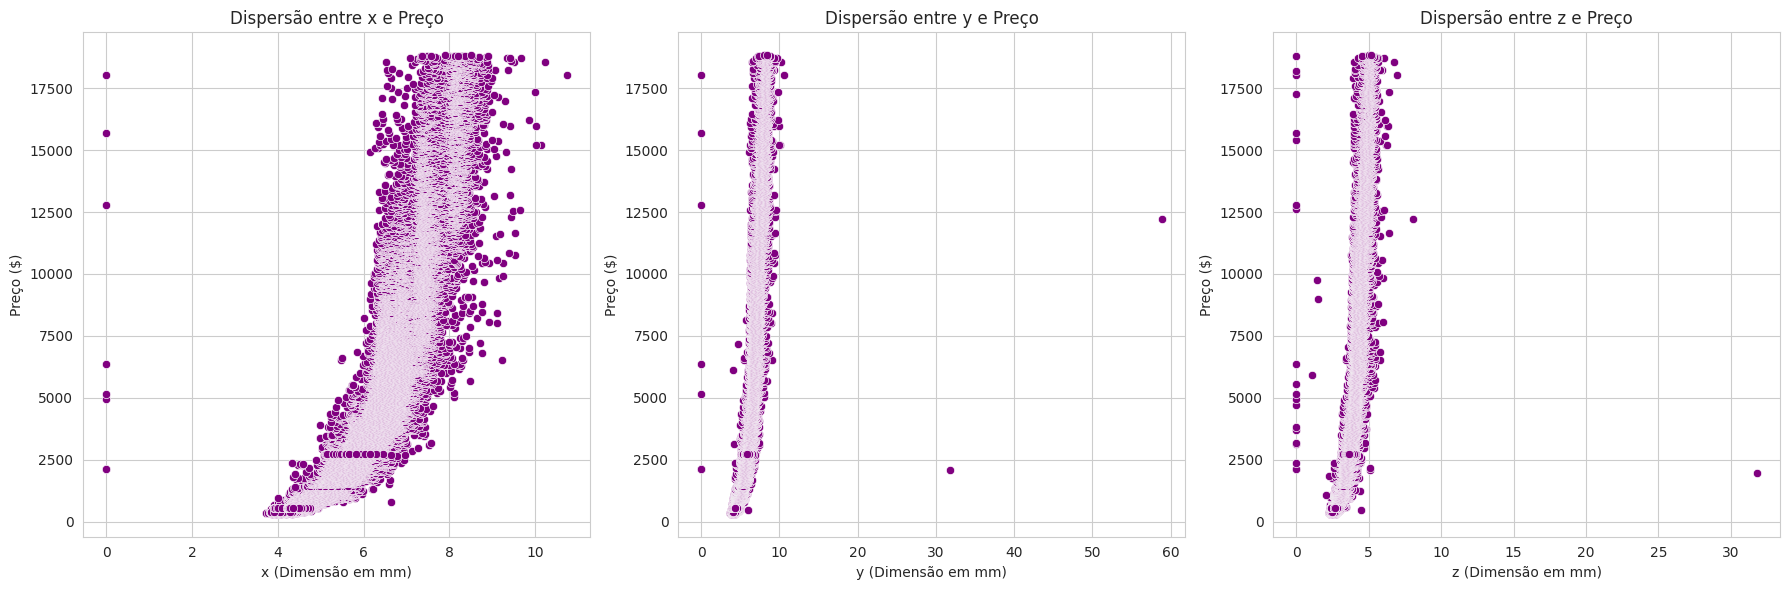

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregando o conjunto de dados
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
dados = pd.read_csv(url)

# Configurando o estilo para os gráficos
sns.set_style("whitegrid")

# Calculando a correlação entre as dimensões físicas e o preço
correlacao_x = dados[['x', 'price']].corr().iloc[0, 1]
correlacao_y = dados[['y', 'price']].corr().iloc[0, 1]
correlacao_z = dados[['z', 'price']].corr().iloc[0, 1]

# Criando gráficos de dispersão
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gráfico de dispersão entre x e preço
sns.scatterplot(ax=axes[0], x='x', y='price', data=dados, color='purple')
axes[0].set_title('Dispersão entre x e Preço')
axes[0].set_xlabel('x (Dimensão em mm)')
axes[0].set_ylabel('Preço ($)')

# Gráfico de dispersão entre y e preço
sns.scatterplot(ax=axes[1], x='y', y='price', data=dados, color='purple')
axes[1].set_title('Dispersão entre y e Preço')
axes[1].set_xlabel('y (Dimensão em mm)')
axes[1].set_ylabel('Preço ($)')

# Gráfico de dispersão entre z e preço
sns.scatterplot(ax=axes[2], x='z', y='price', data=dados, color='purple')
axes[2].set_title('Dispersão entre z e Preço')
axes[2].set_xlabel('z (Dimensão em mm)')
axes[2].set_ylabel('Preço ($)')

# Exibindo os gráficos
plt.tight_layout()
plt.show()

5. Quais combinações de **características** resultam em diamantes com **maior valor** no mercado?

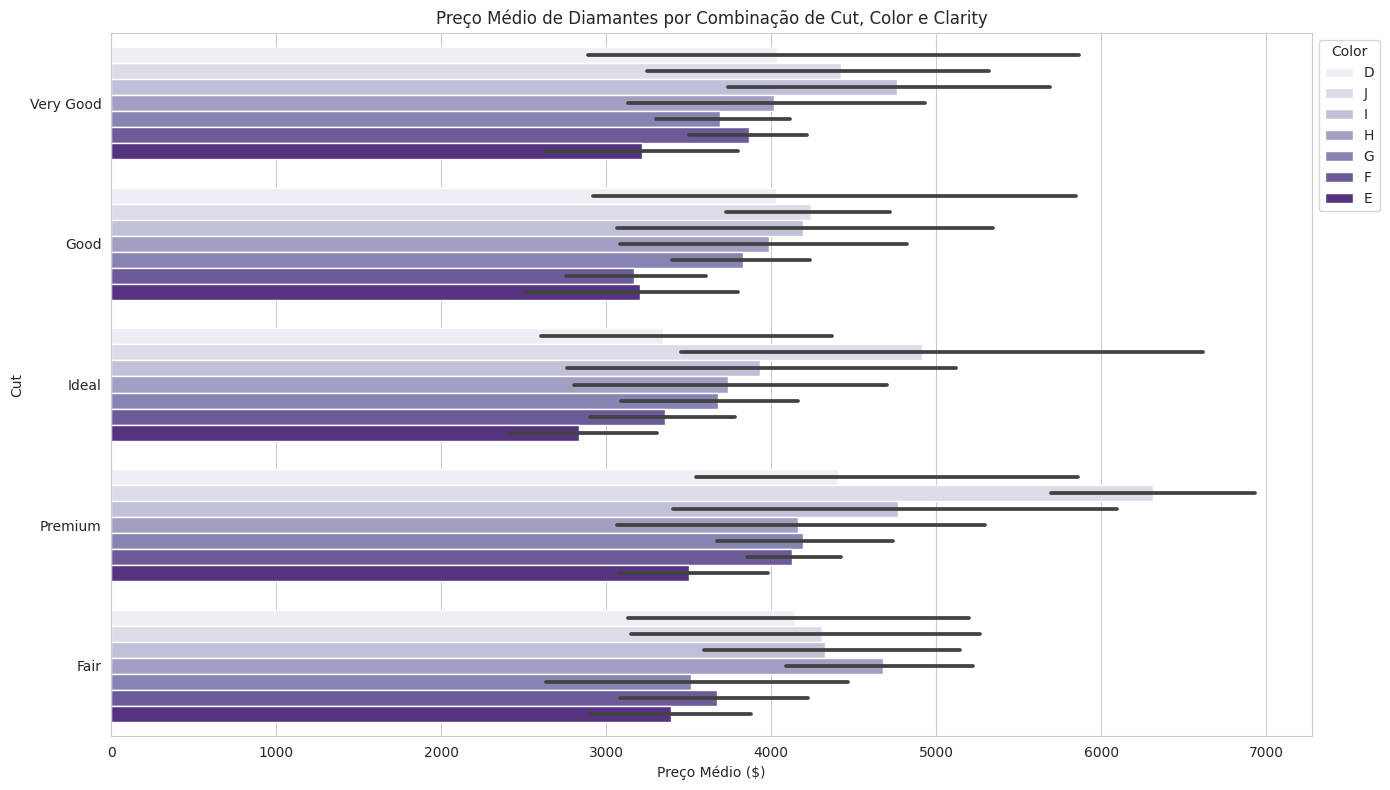

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Carregando o conjunto de dados
url = "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/diamonds.csv"
dados = pd.read_csv(url)

# Configurando o estilo para os gráficos
sns.set_style("whitegrid")

# Calculando a média de preço para cada combinação das características
combinacoes = dados.groupby(['cut', 'color', 'clarity'])['price'].mean().reset_index()

# Ordenando as combinações de forma decrescente pelo preço médio
combinacoes_sorted = combinacoes.sort_values(by='price', ascending=False)

# Criando o gráfico de barras agrupadas
plt.figure(figsize=(14, 8))
sns.barplot(x='price', y='cut', hue='color', data=combinacoes_sorted, dodge=True, palette='Purples')

# Configurações adicionais
plt.title('Preço Médio de Diamantes por Combinação de Cut, Color e Clarity')
plt.xlabel('Preço Médio ($)')
plt.ylabel('Cut')
plt.legend(title='Color', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


### Insights

- **Hipótese 1** : Diamantes com maior peso (carat) tendem a ter preços mais elevados.
    - **Insight 1**: A análise dos dados confirma que há uma forte correlação positiva entre o peso (carat) e o preço do diamante. Diamantes com maior peso geralmente têm preços mais altos, o que está de acordo com a expectativa de mercado. No entanto, o impacto do peso pode ser modulado por outras variáveis, como o corte e a cor. 
- **Hipótese 2**: Qualidade superior de corte (cut) está associada a preços mais altos.
    - **Insight 2**: Diamantes com qualidade de corte superior, como "Ideal" e "Excellent", de fato, tendem a ser mais caros. Isso sugere que o mercado valoriza mais a estética e o brilho dos diamantes, que são amplamente influenciados pela qualidade do corte. Por outro lado, diamantes com cortes inferiores, como "Fair" ou "Good", tendem a ter preços mais baixos.
- **Hipótese 3**: Diamantes com menor coloração (mais próximos de D) e maior pureza (clarity mais alta) possuem preços mais elevados.
    - **Insight 3**: A cor e a clareza desempenham um papel importante na definição do preço de um diamante. Diamantes com coloração "D", que são mais transparentes, e com maior clareza (como "IF" e "VVS1"), têm preços significativamente mais altos. Em contraste, diamantes com coloração "J" e clareza inferior são mais baratos.
- **Hipótese 4**: Dimensões fora do padrão ideal (relativo à profundidade e tabela) podem reduzir o valor de mercado dos diamantes.
    - **Insight 4**: A análise das dimensões, especialmente a profundidade e a tabela, revela que diamantes com proporções não ideais, como profundidade excessiva ou tabela muito larga, tendem a ter preços mais baixos. Isso sugere que a simetria e as proporções ideais são importantes para determinar o valor de mercado do diamante.
- **Hipótese 5**: Há uma correlação positiva entre o peso (carat) e as dimensões físicas (x, y, z).
    - **Insight 5**: Existe uma correlação positiva entre o peso e as dimensões físicas dos diamantes. Diamantes mais pesados geralmente possuem maiores dimensões, como comprimento, largura e profundidade. No entanto, é importante notar que as proporções ideais dessas dimensões ainda são determinantes para o valor do diamante, e o aumento do peso pode não ser suficiente para garantir um preço mais alto se as proporções não forem favoráveis.